In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
import itertools
import mpl_toolkits.mplot3d.art3d as art3d
import imageio
from IPython.display import display, Image
import pandas as pd
import math

# Probability
## The What
Perhaps one way to describe probability is as similar to logic, but when uncertainty comes in.

For instance, logic could take the statements "if something flies, then it is a bird" and "if something is a bird, then it is delicious" and allow us to deduce that "if something flies, then it is delicious", but it can't help us in cases where not all that flies is a bird or not all that is a bird is delicious. Probability can: with probability we can be given the facts "If something flies, then there is a 90% chance it is a bird" and "If it is a bird, there is an 80% chance it is delicious, otherwise it definitely is not delicious". From this we can infer that there is a 72% chance that something that flies is delicious, which we couldn't have done using logic.

There is a difference between the "frequentist" and "bayesian" interpretations of probability. We won't go too much into that. Frankly most people typically use both approaches in different situations, which essentially boils down to saying that they accept that just about everything we talk about in the language of probabilities in our daily lives are indeed probabilities.

Here is an interesting video on the topic: https://www.youtube.com/watch?v=KhAUfqhLakw

## The Why
Why do we need probability in computational astronomy? Or in science in general? Considering the fact that a lot of modern computational astronomy revolves around the analysis of large amounts of data, and as you will see, Machine Learning and AI, then:
* Probabilistic reasoning is necessary in the world because very few things are certain, so our AI systems should reason using probabilistic rules. To give a concrete machine learning example, take the MNIST image below. Is it a weirdly drawn 4 or a weirdly drawn 9? Turns out it's a 4, which you might have thought was the most plausible answer, but I am sure you would not have said it with certainty, and that is why it seems reasonable for your machine learning algorithm to not have to give its answer with certainty either.

<img src="img/4_9.png" width="200">

* We often need to analyze machine learning algorithms probabilistically. As a simple example, when we evaluate a classification model we often use its accuracy, which is after all the probability that the model will output the right answer given an example. More complicatedly we can ask questions such as "What is the probability that my algorithm will have accuracy X if I give it N examples to train on?"

Another crucial reason why we need probability is that logic is <b>discrete</b> and probability is <b>continuous</b>. Take this picture for example: is it a dog or a cat?

<img src="img/cat.jpg" width="400">

I think we all agree that there is no probability involved here. This is definitely, 100% a cat, so the "very few things are certain" argument above should not apply.

That may be so, but it is still important for our model to return a probability that something is a cat rather than a certainty, simply because probabilities are continuous and certainties are not. If our algorithm was outputting certainties and thought the picture above was a dog, it would be really hard to know how to change its parameter so that it outputs the right answer without also ruining its performance on the examples it does perform well on. By contrast, with probabilities there is a straightforward way to increase the probability that it gives to the picture being a cat - we will see this later on.

### Sources of Uncertainty
There are two main sources of uncertainty that are crucial to many data analysis and machine learning systems:
* <b>"Real" stochasticity</b> - stochasticity is just a fancy word for "randomness". Sometimes the world literally flips a coin, and you have to deal with that. One example is when playing 'guess the next word'. If I give you the sentence "Malta is a ...", can you predict what the next word is? No, because it could literally be any number of things.

The purists among you may argue that there is a difference between "inherent stochasticity" and "incomplete observability". If somebody flips a coin, is the answer random because there are actual quantum processes deciding which side it ends up on, or does it just seem random because we do not have information on the speed at which the coin rotates, the density of the molecules of air, etc.? But the answer to that, for the purposes of many applications will almost always be: it does not matter.

* <b>Incomplete modeling</b> - sometimes you just cannot model everything, or you do not want to. Going back to our 'guess the next word' game, the truth is that in spite of all the genuine progress in Machine Learning, computers still cannot understand certain concepts (like language) in the same way that humans can, and that means that humans are naturally better at understanding concepts (and data) than machines are. Humans can be 100% certain of many things where a machine is not. This means that our algorithms need to rely on outputting probabilities simply because they are not good enough yet. Similarly, you might decide that modeling all the complexity involved in knowing something for certain is too high, and that you are comfortable with being wrong some of the time. It is much cheaper to remember "most birds can fly", than "all birds can fly except sick, injured or very young birds, as well as kiwis, ostriches, emus, etc."

# Random Variables
A random variable is a "variable" whose value changes randomly. Computationally, that might not make a lot of sense, so think of a random variable as a function that takes no argument, and returns a random value. This example is of a random variable X, that is randomly either 1 or 2.

In [2]:
def X():
    return random.choice([1, 2])

print(X())
print(X())
print(X())

2
1
2


So when talking about a random variable X, are we referring to the function defined using 'def X():', or are we referring to the return value that we get when calling 'X()'? The answer is: it depends. The truth is that mathematical notation is sloppy to define, but in general it will generally be straightforward to figure out whether we are referring to the operation 'def X():', or the value 'X()'. As a final note, if the random variable is used as a number in a mathematical expression, it normally is not evaluate each time. Do this:

In [3]:
x = X()
x < 1.5 and x > 0.5

False

Do not do this:

In [4]:
X() < 1.5 and X() > 0.5

True

Random variables can be <b>continuous</b> or <b>discrete</b>. Let us go over some definitions:
* A discrete random variable is a random variable that can return (i.e. "take on") only "disconnected" values. In other words, between any two numbers that it can return, there are other numbers (infinitely many in fact) that it cannot return.

For instance our variable X above is discrete because it can only return 1 or 2, but not 1.5, 1.25, 1.58928921 or any of the other numbers between 1 and 2. Likewise, even a variable that can take on any of the following numbers: 0.5, 1, 1.5, 2, 2.5... and so on, is discrete, even though it has infinite possibilities.

* A continuous random variable can take on any of the values on one (or several) intervals.

For instance the variable Y below can take on any number between 0 and 1. Could it take on 0.03920? Yes. 0.23? Yes. etc.

In [5]:
# A continuous random variable.
def Y():
    return random.random()

Y()

0.602294541525769

This distinction is important for two reasons:
* Discrete random variables can be dealt with with regular arithmetic. Continuous random variables require calculus.
* All values that a discrete random variable can take on have a probability greater than 0. All values that a continuous random variable can take on have a probability equal to 0!

Think about the variable Y above: every number between 0 and 1 has the same probability of being returned by Y. But how many numbers are there between 0 and 1? Infinity! So it is impossible that the probability for each number be greater than 0 because otherwise the total probability will sum to infinity.

# Distributions, PMFs and PDFs
A distribution is a way of describing the probabilities of the different possible outputs of a random variable. A distribution can tell us what the probability is that a random variable will output a given value or a value in a given interval.

In Python, many distributions are supported in the 'scipy.stats' module. We will explain a bit about how to explore that module here.

A discrete distribution has a probability <b>mass</b> function (PMF). It takes in a value and outputs a probability. For instance, if P is the PMF of our variable X above, you have P(1) = 0.5. Sometimes we write P(X = 1) so that we are sure that it is the PMF of X.

If you plot this function, the x axis will show the different values it can take on, while the y axis will show the probability of that value. Of course, the sum of all the y values must be equal to 1 since the sum of probabilities for a random variable must be 1.

The discrete distributions supported by scipy are found here: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html. This allows us to create random variables using known distributions, which is more convenient than writing our own function. One thing to note is that to sample from a random variable, we now need to call the rvs() function on the distribution object. For example, let's sample from a "binomial" distribution:

In [6]:
X = scipy.stats.binom(4, 0.5)
print(X.rvs())

2


Because the values of the discrete random variable samples are disconnected, a PMF looks "spiky", like this:

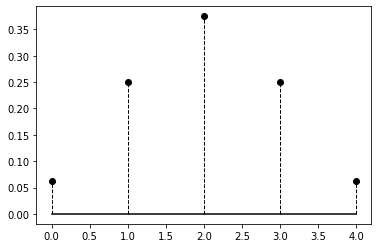

In [7]:
values = np.arange(0, 5)
probabilities = X.pmf(values)

markerline, stemlines, baseline = plt.stem(values, probabilities, use_line_collection=True, markerfmt='ko', linefmt='k--', basefmt='k-')
plt.setp(stemlines, 'linewidth', 1)
plt.show()

There can be a PMF for multiple variables, in which case we call it a "joint PMF". So the PMF P(X = x, Y = y) gives the probability that X is equal to x and Y is equal to y. Often this is the same as the probability that X is equal to x times Y is equal to y, but not always! Let us look at what a joint PMF might look like:

In [8]:
def animate_3d(name, fig, ax, elev=40, fps=15):
    images = []
    #ax.set_axis_off()
    for i in range(0, 360, 4):
        ax.view_init(elev=elev, azim=i)
        fig.canvas.draw()
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(data)
        
    imageio.mimsave(f'runs/{name}.gif', images, fps=fps)
    display(Image(f'runs/{name}.gif'))

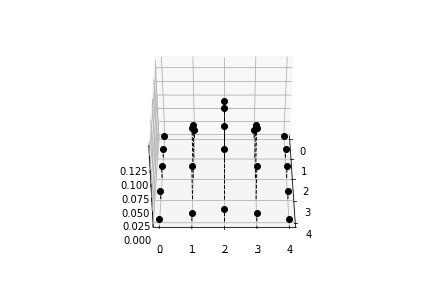

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

joint_probabilities = np.outer(probabilities, probabilities)
for i, j in itertools.product(range(len(probabilities)), range(len(probabilities))):        
    xi = values[i]
    yi = values[j]
    zi = joint_probabilities[i, j]
    line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o', markevery=(1, 1), color='k', linewidth=1, linestyle='--')
    ax.add_line(line)
ax.set_xlim3d(np.min(values) - 0.1, np.max(values) + 0.1)
ax.set_ylim3d(np.min(values)- 0.1, np.max(values) + 0.1)
ax.set_zlim3d(0, np.max(joint_probabilities) + 0.001)    
animate_3d('pmf', fig, ax)
plt.close()

Continuous random variables, on the other hand, have a probability <b>density</b> function (PDF). It is also a function of the values that the the random variable can take, but it does not return the probability of a given value: as we saw earlier, the probability is 0 for every possible value.

However, we might want to express the notion that values near 0 should be more likely than values near 2, for instance, even though both 0 and 2 have 0 probability. This is where the probability density function comes in: the value of the PDF 'p' at 'x' ('p(x)') is proportional to the probability of getting a number that is within an interval very close to 'x'.

Specifically it is defined so that the probability of the value falling within an interval is the area under the curve of the PDF in that interval. In other words, to get the probability of the value being in an interval you need to integrate the PDF over that interval, just like if you wanted to do the same with a discrete random variable, you would need to sum the values of the PMF in that interval: integrating is basically the continuous equivalent of summing.

Sadly, unlike summing, integrating by hand is pretty hard. Fortunately, using scipy in Python, this is taken care of for you. You can use 'scipy.integrate.quad'. The first value it returns is the integral and the second can be ignored (it's an estimate of how much error there might be in the answer, since integrating numerically is an approximate process).

The continuous distributions in scipy can be found here: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

Let's redefine the random variable Y above, which as you will recall was uniformly distributed from 0 to 1:

In [10]:
Y = scipy.stats.uniform()
Y.rvs()

0.38185303615925603

As we recall, Y is a continuous random variable for which all values from 0 to 1 have equal probability of being chosen and all values outside have 0 probability. Let's show what this looks like in terms of its PDF:

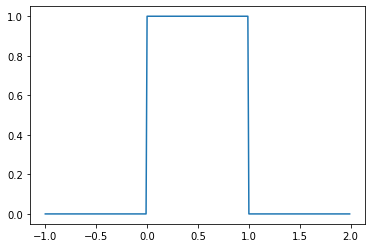

In [11]:
x = np.arange(-1, 2, 0.01)
y = Y.pdf(x)
plt.plot(x, y)
plt.show()

We would expect that the probability that Y returns a number between 0.3 and 0.4 would be 0.1 since that interval covers 10% of the allowable range. Likewise, clearly the probability that the value falls between 0 and 1 must be 1, and indeed the probability that it falls between -1 and 2 must also be 1. Let us check by integrating:

In [12]:
def p_prob(name, val):
    print(f'P({name}) = {val:.2f}')

p_prob('Y > 0.3 & Y < 0.4', scipy.integrate.quad(Y.pdf, 0.3, 0.4)[0])
p_prob('Y > 0 & Y < 1', scipy.integrate.quad(Y.pdf, 0, 1)[0])
p_prob('Y > -1 & Y < 2', scipy.integrate.quad(Y.pdf, -1, 2)[0])

P(Y > 0.3 & Y < 0.4) = 0.10
P(Y > 0 & Y < 1) = 1.00
P(Y > -1 & Y < 2) = 1.00


Just like with PMFs, a PDF can relate to two different random variables. We then call it a joint, or <b>multivariate</b> PDF. Here's an example below:

KeyboardInterrupt: 

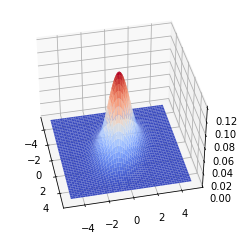

In [13]:
scipy.stats.random_correlation.rvs([0.3, 1.7])

Z = scipy.stats.multivariate_normal(
    mean=[0.0, 0.0],
    cov=[[2, -0.5],
         [-0.5, 1]]
)

x, y = np.mgrid[-5:5:0.01, -5:5:0.01]
pos = np.dstack((x, y))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(
    X=x, Y=y, Z=Z.pdf(pos), 
    cmap='coolwarm', rcount=50, ccount=50
)
animate_3d('pdf', fig, ax)
plt.close()

## Properties of Normal Distributions
In the example above, we have inadvertently defined a multivariate normal distribution via various properties, in particular the mean and covariance matrix. In order to understand these very important descriptors of the distribution, we shall go back a few steps and consider some elementary definitions of mean and variance of a series of univariate values.

For a given list of values for a random variable $X = x_{1}, x_{2}, ...$, the expectation, or arithmetic mean (what we generally consider to be an average), is defined by the sum of all the values in the list, divided by the number of values N i.e.

\begin{equation}
E(X) = \mu = \frac{1}{N} \sum_{i=1}^{N}x_{i}
\end{equation}

If we had to sample from a distribution which by definition has a mean around a particular value e.g. 3, then we could expect the actual mean of the sampled values to be close to 3. Furthermore, for the same values A, we can calculate the variance, which iss the expectation of the squared deviation of a random variable from its mean:

\begin{equation}
Var(X) = \sigma^{2} = \frac{1}{N} \sum_{i=1}^{N}(x_{i}-\mu)^{2}
\end{equation}

These definitions allow us to create univariate normal distributions (Gaussians) of various shapes e.g.

In [ ]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = 0
sigma = 5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

Another characteristic of a normal distribution to take note of is derived from the variance, and is called the standard deviation, which is a measure that is used to quantify the amount of variation or dispersion of a set of data values. The standard deviation is defined as the square root of the variance:

\begin{equation}
\sigma = \sqrt{\sigma^{2}}
\end{equation}

Standard deviation is useful in that it gives us a quantification of what is 'normal' within a distribution of values, and what is not normal and weird. Any value that is one standard deviation (or one sigma) away from the mean (on either side), can be said to be non-normal.

These properties extend to multivariate normal distributions (or multivariate Gaussians). We would simply be extending the model to have a mean for every random variable, as well as a variance for each variable. So, essentially, for $K$ dimensions, the mean would be defined as:

\begin{equation}
\mu = E(X) = [E(X_{1}, E(X_{2}), \ldots, E(X_{K})]
\end{equation}

In the case of variance, for a multivariate distribution, what we would need to define is what is called a variance matrix (sometimes referred to as a covariance matrix). Intuitively, the covariance matrix generalizes the notion of variance to multiple dimensions. As an example, the variation in a collection of random points in two-dimensional space cannot be characterized fully by a single number. Why? The variance might not be the same in every dimension i.e. visually, the outline of all the samples from the distribution do not look circular, when plotted, but elliptical. Does this mean a variance value for every random variable is enough? No, because you may have data where dimensions are correlated? If so, the ellipse would be rotated about an axis, and in order to describe this additional information a $2\times 2$ matrix would be necessary to fully characterize the two-dimensional variation.  The symbol for the covariance matrix is usually defined as $\Sigma$.

For a univariate Gaussian:
\begin{equation}
Var(X) = Cov(X,X)
\end{equation}

By extension, for a multivariate Guassian:
\begin{equation}
\begin{split}
Cov(X,Y) & = E[(X-E[X])(Y-E[Y])] \\
& = \frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})
\end{split}
\end{equation}

Because the covariance of the i-th random variable with itself is simply that random variable's variance, each element on the principal diagonal of the covariance matrix is the variance of one of the random variables. Because the covariance of the i-th random variable with the j-th one is the same thing as the covariance of the j-th random variable with the i-th random variable, every covariance matrix is symmetric. Also, every covariance matrix is positive semi-definite.



# Marginalization
What if you are given a joint PMF and want to know the PMF or PDF corresponding to a single variable? In other words, you know P(X=x, Y=y) and want to know just P(X=x).

Logically, it seems like the probability that X = x ignoring Y should be the probability that X=x and Y=0 (or whatever the first possible value of Y is) plus the probability that X=x and Y=1 etc. for all the possible values of Y. In other words, we take the sum of P(X=x, Y=y) for all possible y. In math:

\begin{equation}
P(X=x) = \sum_{y}P(X=x,Y=y)
\end{equation}

This process is indeed correct and is called marginalization. The resulting distribution of X is called the marginal distribution. Let's see what it looks like for a PMF, as a reminder, we have a set of joint probabilities in our 'joint_probabilities' variable:

In [ ]:
new_probabilities = np.sum(joint_probabilities, axis=0)

markerline, stemlines, baseline = plt.stem(values, new_probabilities, use_line_collection=True, markerfmt='ko', linefmt='k--', basefmt='k-')
plt.setp(stemlines, 'linewidth', 1)
plt.title('Marginalized probabilities')
plt.show()

In this case we recovered the original PMF we showed for X, because joint_probabilities contained the probabilities for independent variables. This will not necessarily always be the case.

Marginalization also works for PDFs, and again the only difference is that we need to use integration over all possible y values instead of sum, ie:

\begin{equation}
p(x) = \int_{-\infty}^{\infty} p(x,y) dy
\end{equation}

Let uss see what it looks like when we marginalize for X in our previous continous join PDF:

In [ ]:
def Z_pdf_fixed_x(x):
    def pdf(y):
        return Z.pdf([x, y])
    return pdf

# Close enough to infinity for our purposes
INF = 100
    
values = np.arange(-4, 4, 0.1)
probs = [scipy.integrate.quad(Z_pdf_fixed_x(x), -INF, INF)[0] for x in values]

plt.plot(values, probs)
plt.show()

Perhaps a way to view marginalization is as a form of "squashing": imagine compressing the 3D pictures you saw above along the y axis, pushing the probability mass on top of itself until the 3D graph is completely flattened, leaving just the original x axis. Of course, since you can have joint distributions of more than two variables, this visualization only goes so far.

# Conditional Probability
Marginalization allows us to get the distribution of variable X ignoring variable Y from the joint distribution of X and Y, but what if we want to know the distribution of X given a specific value of Y? This probability is called the conditional probability of X given Y, and is denoted like so:
\begin{equation}
P(X=x|Y=y)
\end{equation}

The vertical bar is usually pronounced "given" in this case.

To give a specific example, suppose you want to know whether someone comes from Malta, and you know that they speak fluent Maltese. You are given the following joint PMF showing the proportion of the world that speaks Maltese and lives in Malta:

In [ ]:
maltese_df = pd.DataFrame({
    'Country': ['Malta', 'Other'],
    'Yes': np.array([80, 15]) / 7500,
    'No': np.array([2, 7500-80-15-2]) / 7500},
    columns=['Country', 'Yes', 'No']
).set_index('Country')
maltese_df

How do you know the probability that someone who speaks Maltese is from Malta? Well it seems like you need to know how many people in the world speak Maltese as well as how many people there are in Malta in total. Indeed, you do not need the actual count of people in either case, the proportion of the world population will suffice. In other words:
\begin{equation}
P(\text{Country}=\text{Malta}|\text{Maltese}=\text{Yes}) = \frac{P(\text{Maltese}=\text{Yes},\text{Country}=\text{Malta})}{P(\text{Maltese}=\text{Yes})}
\end{equation}

The way we get the denominator is of course using marginalization as described above, ie by summing the proportion of everybody who speaks Maltese. We get:

In [ ]:
print(maltese_df.loc['Malta', 'Yes'])
print(maltese_df.loc[:, 'Yes'])
maltese_df.loc['Malta', 'Yes'] / maltese_df.loc[:, 'Yes'].sum()

An 84.2% chance, which would not be surprising of course, since Malta is mostly a Maltese speaking country. The other Maltese speakers may be in Australia, Canada, etc. The important thing is the general rule of conditional probability as follows:
\begin{equation}
P(X=x|Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)}
\end{equation}

Applying this rule to all possible values of X gives us a new distribution called the conditional distribution of X given Y. Similar to how we said marginalization can be thought of as "squishing" the graph of the joint distribution, taking the conditional distribution is similar to slicing the graph, and then renormalizing it so that the final distribution still sums to 1. Let's "slice" our 3D joint PDF from before along Y = 1.0:

In [ ]:
probs = np.array([Z.pdf([x, 1.0]) for x in values])
probs = probs / np.sum(probs)

plt.plot(values, probs)
plt.show()

It is important to not confuse a conditional probability with something that is actually actionable. In our Malta example, it is clear that teaching someone Maltese will not make them any more likely to be from Malta, but often this pitfall is not so obvious.

<img src="img/correlation.png" width="600">

## Chain Rule of Conditional Probability

We now know how to go from a joint distribution to an marginal distribution and from a joint and marginal distribution to a conditional distribution. Let's now complete the cycle by going from a marginal and conditional distribution to a joint distribution.

The process is again very simple. Suppose you know the probability that someone is Maltese given that they speak Maltese and also the probability that someone anywhere in the world speaks Maltese and you want to know the probability that someone is both Maltese and speaks Maltese. It seems like you need to simply multiply the conditional and marginal probability:
\begin{equation}
P(\text{Country}=\text{Malta},\text{Maltese}=\text{Yes}) = P(\text{Country}=\text{Malta}|\text{Maltese}=\text{Yes})P(\text{Maltese}=\text{Yes})
\end{equation}

Indeed, this follows directly from the definition of conditional probability above. In general:
\begin{equation}
P(x,y)=P(x|y)P(y)
\end{equation}

# Bayes' Rule
Finally, suppose you do not want to know the probability that your friend is Maltese given that he speaks Maltese, but rather the probability that someone speaks Maltese given that they are from Malta.

Of course, we could do it with the full joint PMF table from before, but unfortunately we do not always have access to those. Suppose we know the probability from above (that someone who speaks Maltese is from Malta) as well as the probability that someone anywhere in the world is Maltese and the probability that someone in the world speaks Maltese. Can we figure it out?

Of course, we just need to recover the joint probability, which we did above, and then divide by the proportion of people who are from Malta. In general, we have:
\begin{equation}
P(y|x)=\frac{P(x,y)}{P(x)}
\end{equation}
(from the definition of conditional probability)

So:
\begin{equation}
P(y|x)=\frac{P(x|y)P(y)}{P(x)}
\end{equation}
(from the chain rule of conditional probability)

This last equation is famously known as <b>Bayes' rule</b>. It is very useful in many situations and lies at the core of many applications of probabilistic machine learning, though as you can see, in spite of its fancy name, it is just a straightforward application of our definitions.


# Some Fun
You are given some data representing the spectrum of the Cosmological Microwave Background i.e. electromagnetic radiation from photons back to 300,000 years after the Big Bang, expressed as a difference in apparent temperature from the mean temperature. It would be nice to plot this data, and also look at the distribution of the data.

The data is provided as a text file with values, one value per line. In total there are 640,000 values representing an 800x800 chunk of the spectrum.

In [ ]:
with open('./data/CMBdata') as f:
    cmb_values = f.readlines()
# you may also want to remove whitespace characters like `\n`
# at the end of each line
cmb_values = [x.strip() for x in cmb_values]

cmb_values = np.array(cmb_values).astype(float)


Z = np.zeros((800,800)) # create the data matrix
for i in range(0,800):
    for j in range(0,800):
        Z[i,j] = cmb_values[i+800*j]
        

# Spectral image
plt.imshow(Z)
plt.show()

# Calculate mean values
mu = np.mean(cmb_values)
sigma = np.var(cmb_values)

# plot model
fig, (ax1, ax2) = plt.subplots(1, 2)
fit = stats.norm.pdf(np.sort(cmb_values), mu, sigma)
ax1.plot(np.sort(cmb_values),fit)

# get histogram of data
ax2.hist(cmb_values,bins=32,density=False)

plt.show()

# Conclusion
This only covers the basics of probability and how to use it in Python, but should serve you well throughout this course and beyond. You should certainly spend time exploring these topics in more intricate detail as we forge ahead.
